# Tutorial for Assessing the Riskiness of an Equally Weighted Portfolio of 5 stocks

## Steps

1. Import the Python's number crunchers
2. Pull Adjusted closing prices for the portfolio (consisting of 5 stocks) we want to construct
3. Check the daily returns
4. Construct a covariance matrix for the portfolio's daily returns
5. Annualise the daily covariance matrix with the standard 250 trading days 
6. Assign equal weights to each stock in the portfolio
7. Calculate the variance of the portfolio
8. Check the volatility of portfolio
9. Suggested exercises


In [ ]:
# Import the Python's number crunchers

from pandas_datareader import data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Pull Adjusted closing prices for the portfolio (consisting of 5 stocks) we want to construct

assets =  ['AAPL', 'GM', 'GE', 'FB', 'WMT']

df = pd.DataFrame()

for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo',start='2015-1-1' ,end='2017-1-1')['Adj Close']
    
df.head()

,AAPL,GM,GE,FB,WMT
Date,,,,,
2014-12-31,104.863991,30.949814,23.070532,78.019997,79.569763
2015-01-02,103.866470,30.887754,22.878813,78.449997,79.588287
2015-01-05,100.940392,30.435610,22.458847,77.190002,79.356651
2015-01-06,100.949890,30.896618,21.974977,76.150002,79.968155
2015-01-07,102.365440,31.774321,21.984108,76.150002,82.089905


In [3]:
# Check the daily returns

d_returns = df.pct_change()
d_returns.head()

,AAPL,GM,GE,FB,WMT
Date,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN
2015-01-02,-0.009513,-0.002005,-0.008310,0.005511,0.000233
2015-01-05,-0.028172,-0.014638,-0.018356,-0.016061,-0.002910
2015-01-06,0.000094,0.015147,-0.021545,-0.013473,0.007706
2015-01-07,0.014022,0.028408,0.000416,0.000000,0.026532


In [4]:
# Construct a covariance matrix for the portfolio's daily returns with the .cov() method

cov_matrix_d = d_returns.cov()
cov_matrix_d

,AAPL,GM,GE,FB,WMT
AAPL,0.000249,0.000090,0.000076,0.000121,0.000050
GM,0.000090,0.000248,0.000096,0.000079,0.000048
GE,0.000076,0.000096,0.000156,0.000078,0.000050
FB,0.000121,0.000079,0.000078,0.000290,0.000043
WMT,0.000050,0.000048,0.000050,0.000043,0.000159


In [5]:
# Annualise the daily covariance matrix with the standard 250 trading days

cov_matrix_a = cov_matrix_d * 250
cov_matrix_a

,AAPL,GM,GE,FB,WMT
AAPL,0.062373,0.022415,0.019100,0.030229,0.012560
GM,0.022415,0.062051,0.023970,0.019826,0.012002
GE,0.019100,0.023970,0.039102,0.019564,0.012618
FB,0.030229,0.019826,0.019564,0.072508,0.010694
WMT,0.012560,0.012002,0.012618,0.010694,0.039722


In [6]:
# Assign equal weights to the five stocks. Weights must = 1 so 0.2 for each 

weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
weights

array([ 0.2,  0.2,  0.2,  0.2,  0.2])

In [8]:
# Calculate the variance with the formula

port_variance = np.dot(weights.T, np.dot(cov_matrix_a, weights))
port_variance

0.025668525326601199

In [10]:
# Just converting the variance float into a percentage

print(str(round(port_variance, 4) * 100) + '%')

2.57%


In [11]:
# The standard deviation of a portfolio is just a square root of its variance

port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix_a, weights)))
port_volatility

0.16021399853508805

In [27]:
print(str(round(port_volatility, 4) * 100) + '%')

16.02%


In [13]:
# Proof that Standard deviation of a portfolio is just a square root of its variance

np.dot(weights.T, np.dot(cov_matrix_a, weights)) ** 0.5

0.16021399853508805

# Play around with the data

## Inspiration

### 1. Make random weights and check the volatility of the portfolio
### 2. Check each stocks annual returns and standard deviation

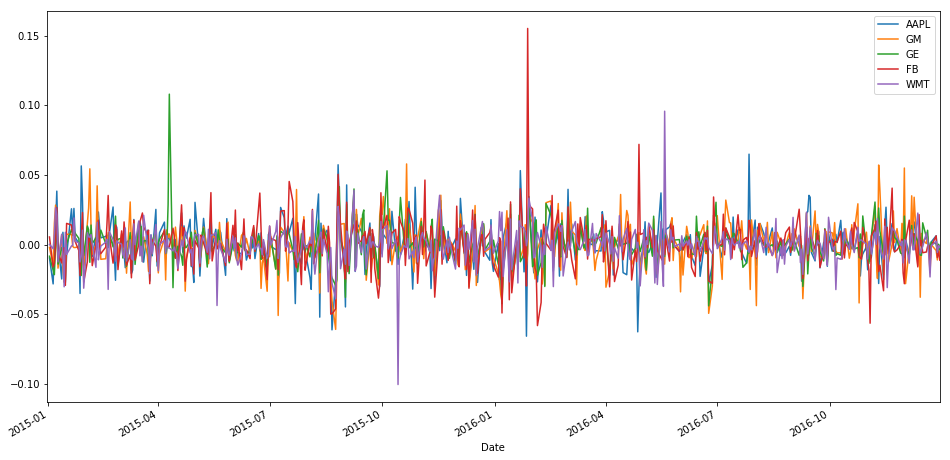

In [31]:
d_returns.plot(figsize=(16,8))

In [25]:
# basic stats on daily returns

d_returns.describe()

,AAPL,GM,GE,FB,WMT
count,504.000000,504.000000,504.000000,504.000000,504.000000
mean,0.000297,0.000296,0.000649,0.000914,-0.000240
std,0.015795,0.015754,0.012506,0.017030,0.012605
min,-0.065706,-0.060811,-0.043924,-0.058105,-0.100405
25%,-0.007224,-0.007745,-0.006100,-0.007533,-0.006160
50%,0.000285,0.000825,0.000356,0.000872,0.000133
75%,0.008541,0.008274,0.006540,0.010167,0.006214
max,0.064963,0.057945,0.108045,0.155214,0.095804


In [26]:
# correlation matrix of daily returns

d_returns.corr()

,AAPL,GM,GE,FB,WMT
AAPL,1.000000,0.360306,0.386758,0.449508,0.252338
GM,0.360306,1.000000,0.486621,0.295570,0.241756
GE,0.386758,0.486621,1.000000,0.367432,0.320167
FB,0.449508,0.295570,0.367432,1.000000,0.199265
WMT,0.252338,0.241756,0.320167,0.199265,1.000000


In [39]:
# annual standard deviation of Apple stock 

d_returns['AAPL'].std() * np.sqrt(250)

0.24974623164836174